In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [2]:
%cd /mnt/sda1/EXMI_data/separated/phone/train
info = open("info.json",'r')
info_r = json.load(info)

/mnt/sda1/EXMI_data/separated/phone/train


In [50]:
%cd /mnt/sda1/EXMI_data/separated/phone/train/righteye/

im = []
for i in range(600):
    k = np.random.randint(0,1076797)
    im.append(Image.open(info_r["frames"][k]))

/mnt/sda1/EXMI_data/separated/phone/train/righteye


In [51]:
def show_(k,i):
    if i == 0:
        plt.imshow(im[k])
        plt.scatter(nn_10[k].argmax()%len(nn_10[k][0]),nn_10[k].argmax()//len(nn_10[k][0])  )
    if i == 10:
        plt.imshow(nn[k])
    if i == 11:
        plt.imshow(nn_1[k])
    if i == 12:
        plt.imshow(nn_2[k])
    if i == 13:
        plt.imshow(nn_3[k])
    if i == 14:
        plt.imshow(nn_4[k])
    if i == 15:
        plt.imshow(nn_5[k])
    if i == 20:
        plt.imshow(nn_10[k])
        plt.scatter(nn_10[k].argmax()%len(nn_10[k][0]),nn_10[k].argmax()//len(nn_10[k][0])  )
def show(k):
    plt.imshow(im[k])
    plt.show()
def show_36(k,si):
    plt.figure(figsize=(15,15))
    for i in range(6):
        for j in range(6):
            plt.subplot(6,6,i*6+j+1)
            show_(k+i*6+j,si)
    plt.show()


In [52]:
im_np = []
for i in range(600):
    im_np.append(np.array(im[i]))

im_npr = []
for i in range(600):
    im_npr.append(np.array(im_np[i][:,:,0]))
    
im_npr_rev = []
for i in range(600):
    im_npr_rev.append(np.ones_like(im_npr[i]) - im_npr[i]/256)

In [53]:
def move_k_multiply(b_osb,k):
    d = b_osb
    while k != 0:
        d = move_1_multiply(d)
        k = k - 1
    return d

def move_1_multiply(b_osb):
    kernel = np.ones((5,5),np.float32)/25    
    kkk = 1
    ddd = np.zeros_like(b_osb)
    for i in range(len(b_osb)-kkk):
        ddd[i] = b_osb[i] * b_osb[i+kkk]
    dst = cv2.filter2D(ddd,-1,kernel)
    return dst

In [54]:
nn = im_npr_rev

In [55]:
nn_1 = []
nn_2 = []
nn_3 = []
nn_4 = []
nn_5 = []
nn_10 = []
for i in range(600):
    nn_1.append(move_k_multiply(nn[i],1))
    nn_2.append(move_k_multiply(nn[i],2))
    nn_3.append(move_k_multiply(nn[i],3))
    nn_4.append(move_k_multiply(nn[i],4))
    nn_5.append(move_k_multiply(nn[i],5))
    nn_10.append(move_k_multiply(nn[i],10))

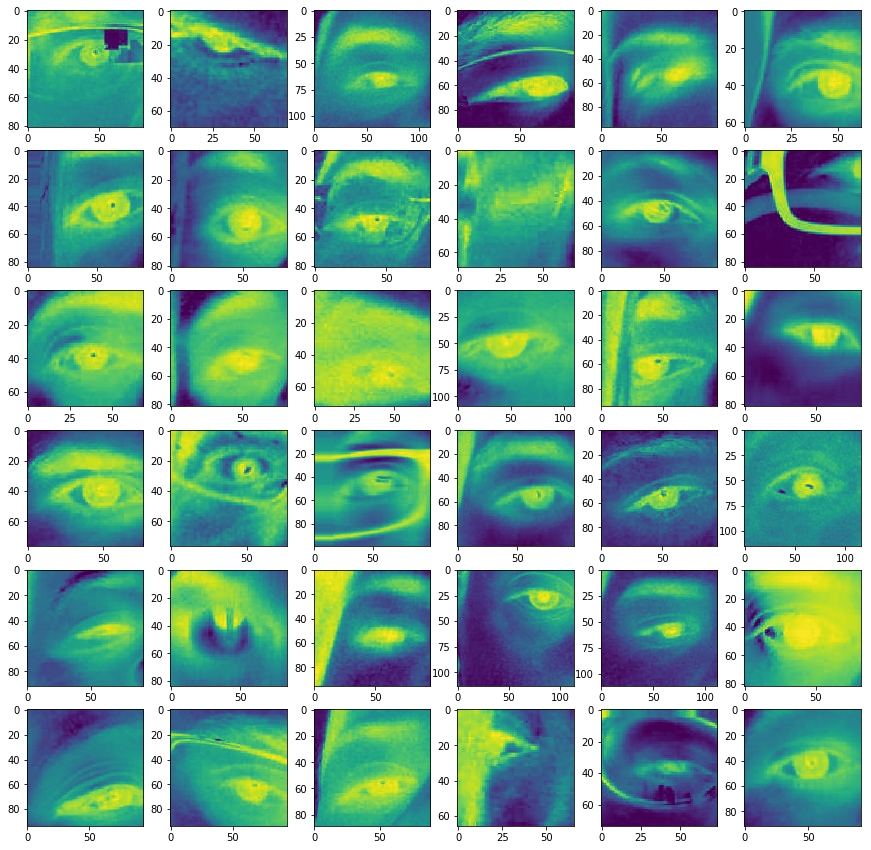

In [72]:
show_36(0,10)

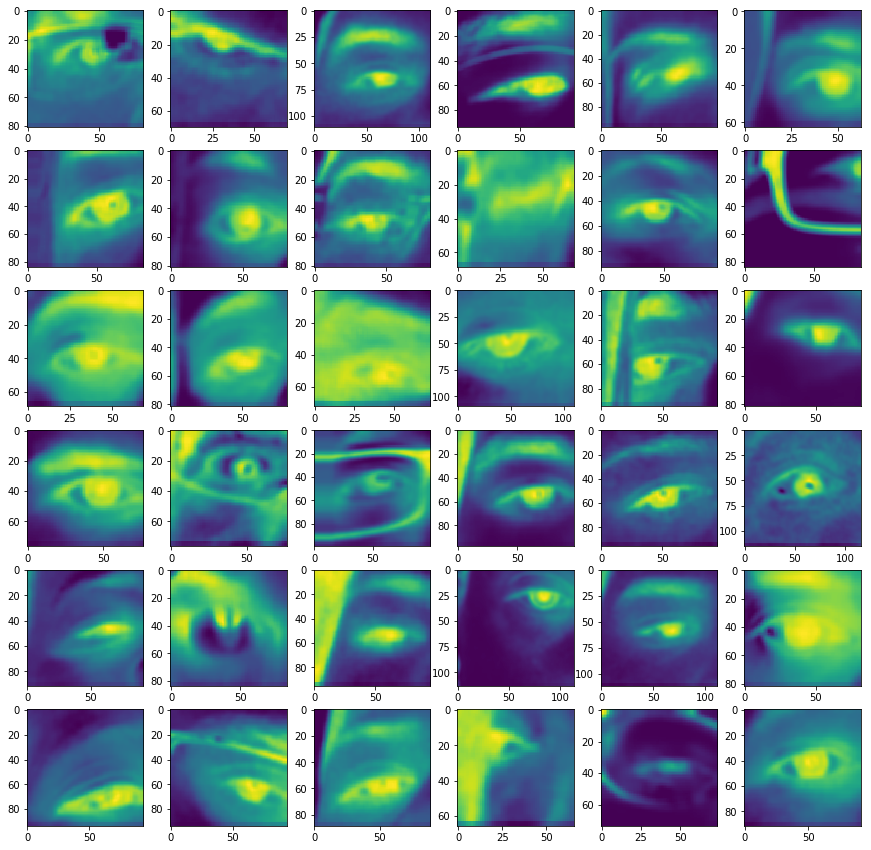

In [56]:
show_36(0,11)

In [84]:
nn_2_sum[0:36,0]

array([  731.25004959,   448.41848863,   750.68316909,   821.47112415,
         994.73866065,   418.37853629,  1218.91017048,   196.34283504,
        1262.45229661,   779.88543163,   996.7715033 ,   289.45765104,
        2054.34489908,  1125.24766978,  1750.26273002,  1175.36150414,
        1582.43689103,   254.0811738 ,  1306.78778184,  2299.45990739,
         948.43160515,   811.34848085,  1160.84743871,  3315.39695891,
         139.01960197,   895.89022049,  2474.43653303,   502.18819667,
         650.11594642,  1290.711887  ,  1117.05114661,   702.44342182,
        1085.80957993,  1140.92100548,    59.78132434,  1943.6443205 ])

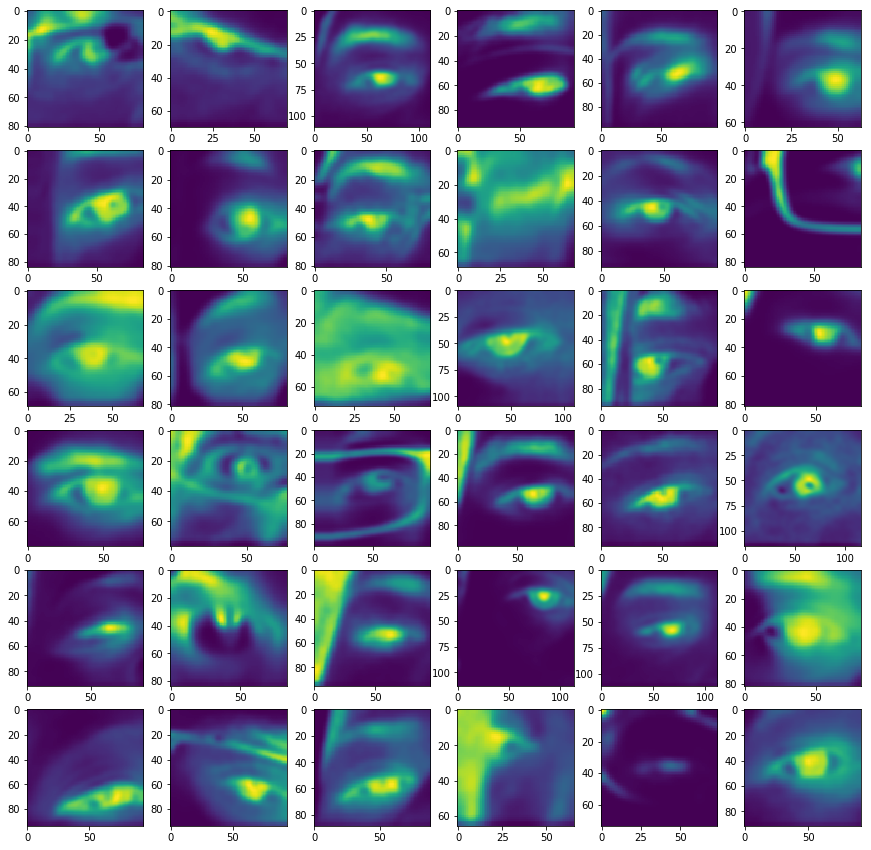

In [57]:
show_36(0,12)

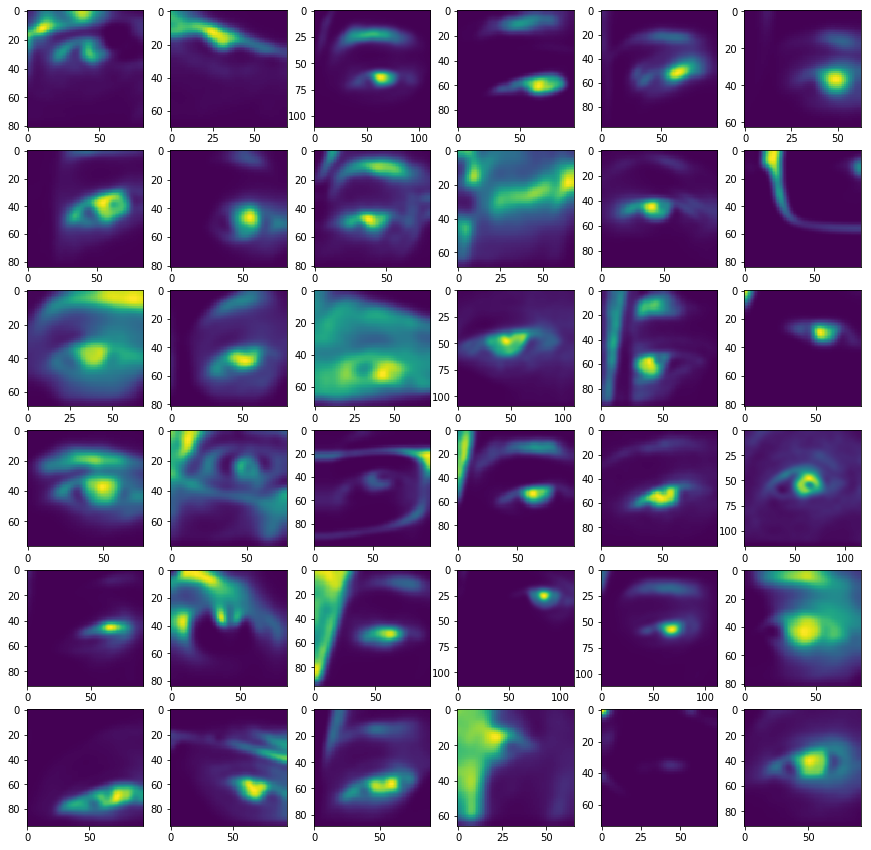

In [58]:
show_36(0,13)

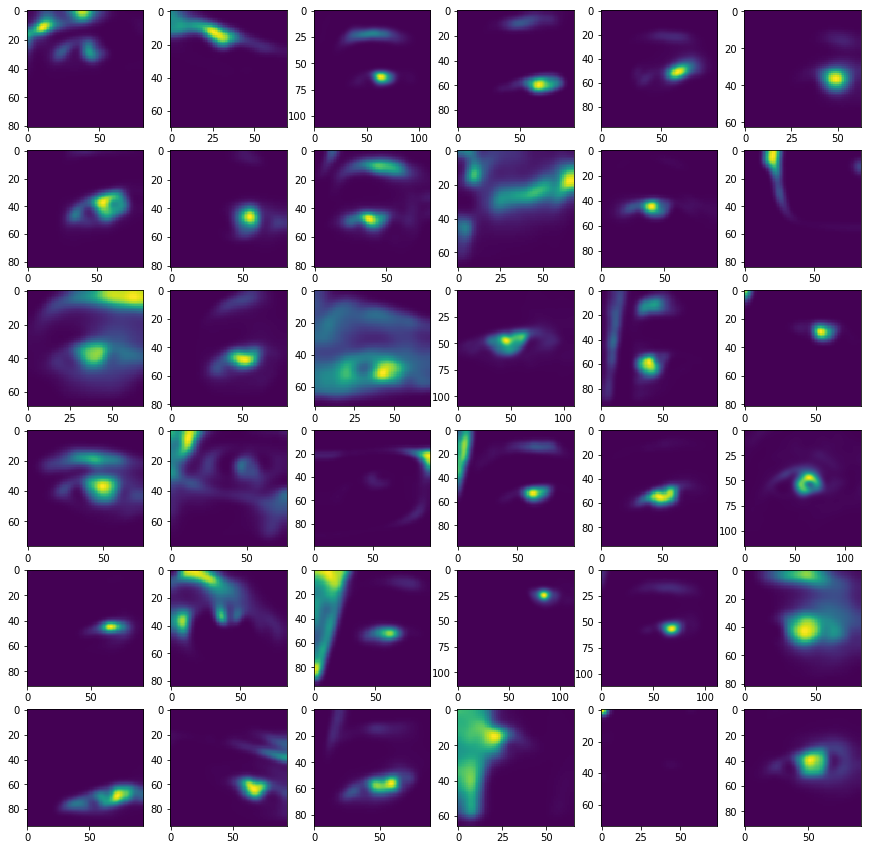

In [59]:
show_36(0,14)

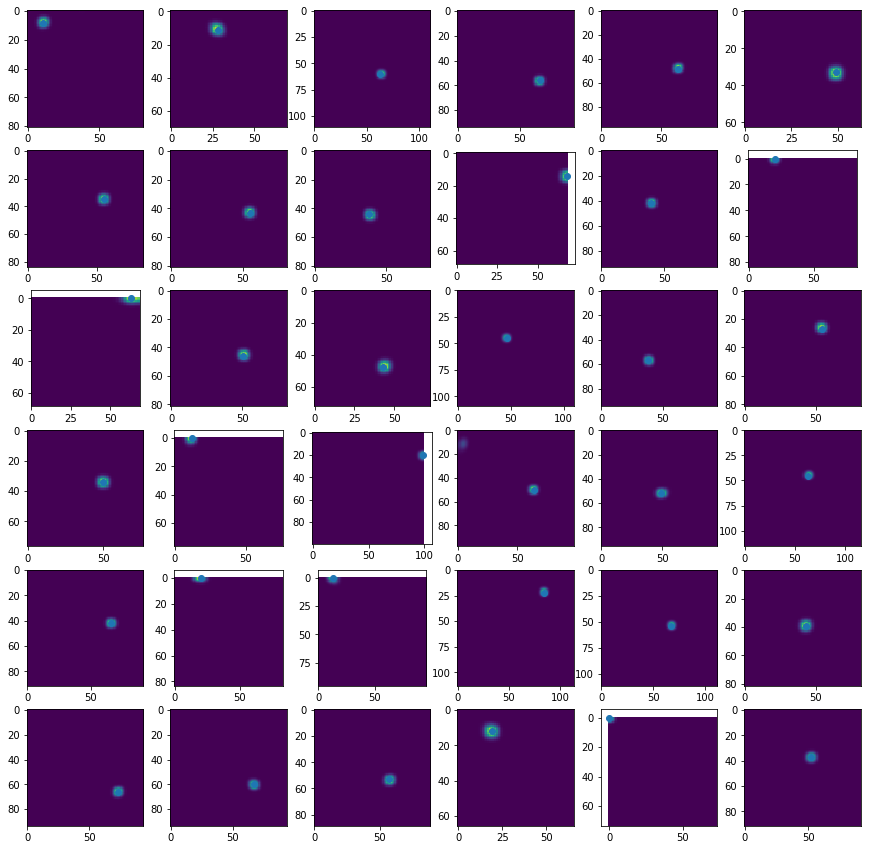

In [60]:
show_36(0,20)

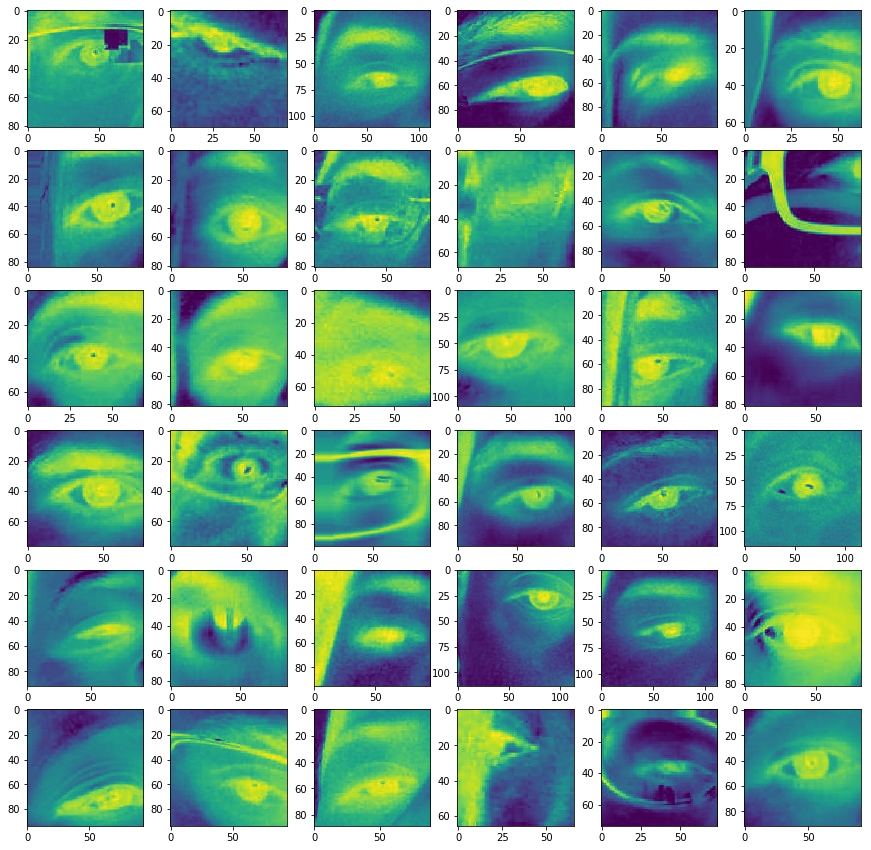

In [61]:
show_36(0,10)

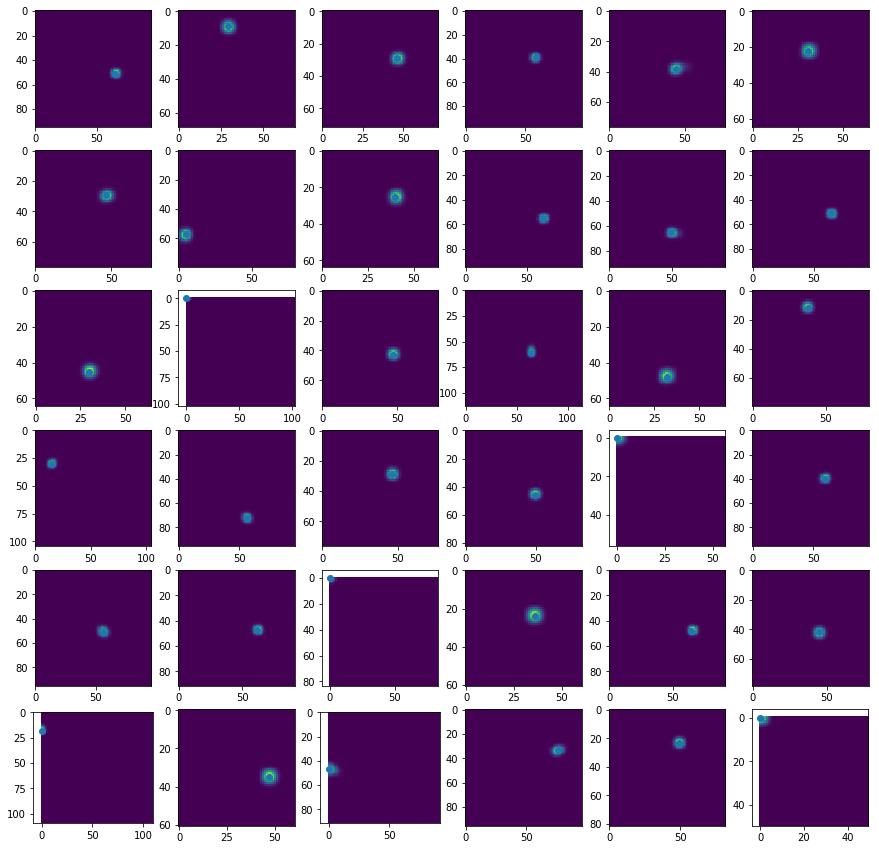

In [45]:
show_36(0,20)

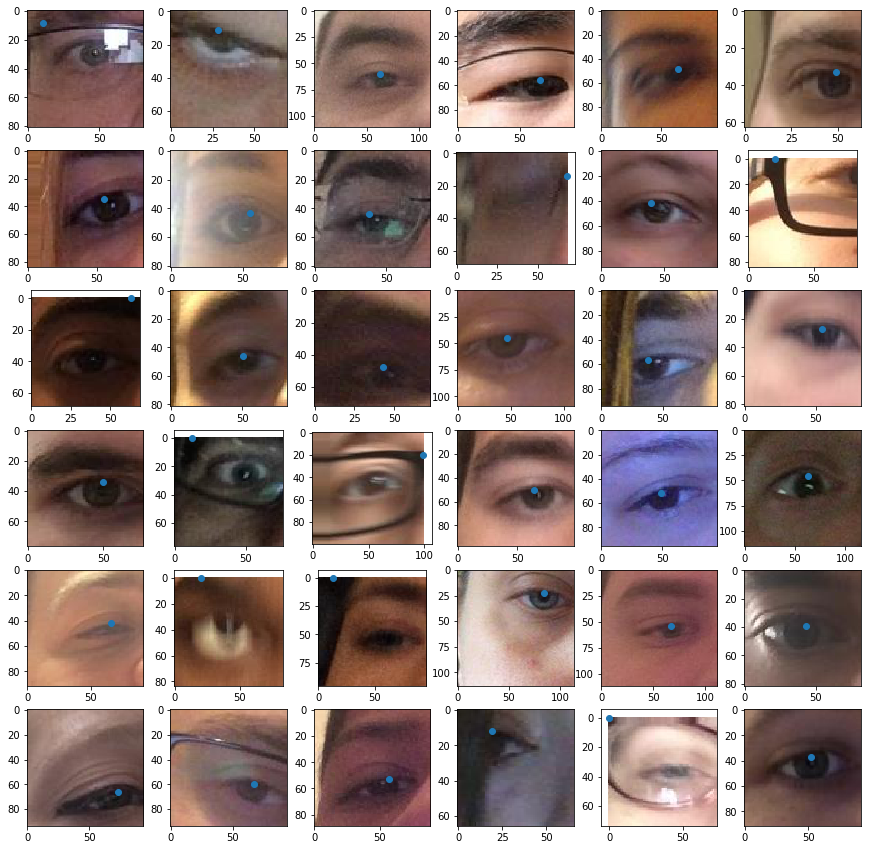

In [62]:
show_36(0,0)

In [49]:
27/36

0.75

In [65]:
nn_2[0]

array([[ 0.12160106,  0.12081266,  0.12265231, ...,  0.05339701,
         0.05237423,  0.0518771 ],
       [ 0.12288382,  0.12216618,  0.12422457, ...,  0.05495327,
         0.05388546,  0.05335237],
       [ 0.12704263,  0.12651622,  0.12915683, ...,  0.05990496,
         0.0587397 ,  0.0581256 ],
       ..., 
       [ 0.03105222,  0.03124347,  0.03144617, ...,  0.03464303,
         0.03370912,  0.03336264],
       [ 0.02761564,  0.02777178,  0.02790052, ...,  0.0293931 ,
         0.02869104,  0.02846848],
       [ 0.02609486,  0.0262341 ,  0.02632897, ...,  0.02725   ,
         0.02662919,  0.02644721]])

In [71]:
k = 0

img = nn_2[k]*(1/nn_2[k].max())*255
img = img.astype(int)
img = np.array(img,dtype='uint8')
cimg = img.copy()

contours,
lines = cv2.fitEllipse(cimg)

try:
    if lines.all() == None:
        print("nothing founded")
except:
    if lines == None:
        print("nothing founded")
        
else:


    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


plt.figure(figsize = (15,5))
plt.subplot(131)
plt.imshow(im[k])
plt.subplot(132)
plt.imshow(cimg)
plt.subplot(133)
plt.imshow(edges)
plt.show()

error: /home/ubuntu/src/opencv/modules/imgproc/src/shapedescr.cpp:353: error: (-215) n >= 0 && (depth == CV_32F || depth == CV_32S) in function fitEllipse


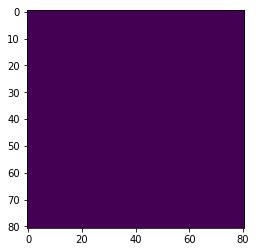

In [68]:
plt.imshow(edges)
plt.show()

In [89]:
nn_2_sum = np.zeros((600))
nn_1_sum = np.zeros((600))
nn_sum = np.zeros((600))
for i in range(600):
    nn_2_sum[i]= nn_2[i].sum()
    nn_sum[i]= nn[i].sum()
    nn_1_sum[i] = 

In [92]:
nn_sum[0:36]/nn_2_sum[0:36]

array([  4.86291099,   5.69579025,   7.32357381,   4.03915217,
         4.89910005,   4.79615755,   3.49166612,  11.6177129 ,
         3.32890053,   3.8332854 ,   4.72105049,   5.47243805,
         1.84770733,   3.42820361,   2.24188217,   5.45452862,
         3.43280129,   7.551167  ,   2.85643764,   2.01216748,
         5.25539098,   5.18797768,   4.55752045,   2.83244622,
        19.06526328,   4.38539012,   2.45231809,   7.7290652 ,
         8.59948166,   3.23392878,   4.23115278,   5.99991049,
         4.12282019,   2.6474157 ,  19.19855166,   2.90058375])

In [91]:
nn_2_sum[0:36]

array([  731.25004959,   448.41848863,   750.68316909,   821.47112415,
         994.73866065,   418.37853629,  1218.91017048,   196.34283504,
        1262.45229661,   779.88543163,   996.7715033 ,   289.45765104,
        2054.34489908,  1125.24766978,  1750.26273002,  1175.36150414,
        1582.43689103,   254.0811738 ,  1306.78778184,  2299.45990739,
         948.43160515,   811.34848085,  1160.84743871,  3315.39695891,
         139.01960197,   895.89022049,  2474.43653303,   502.18819667,
         650.11594642,  1290.711887  ,  1117.05114661,   702.44342182,
        1085.80957993,  1140.92100548,    59.78132434,  1943.6443205 ])

In [93]:
nn_sum[0:36]

array([ 3556.00390625,  2554.09765625,  5497.68359375,  3318.046875  ,
        4873.32421875,  2006.609375  ,  4256.02734375,  2281.0546875 ,
        4202.578125  ,  2989.5234375 ,  4705.80859375,  1584.0390625 ,
        3795.828125  ,  3857.578125  ,  3923.8828125 ,  6411.04296875,
        5432.19140625,  1918.609375  ,  3732.7578125 ,  4626.8984375 ,
        4984.37890625,  4209.2578125 ,  5290.5859375 ,  9390.68359375,
        2650.4453125 ,  3928.828125  ,  6068.10546875,  3881.4453125 ,
        5590.66015625,  4174.0703125 ,  4726.4140625 ,  4214.59765625,
        4476.59765625,  3020.4921875 ,  1147.71484375,  5637.703125  ])